In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import numpy as np
from matplotlib import pyplot as plt

from mtt.visualize import plot_mtt

rng = np.random.default_rng()

In [40]:
from mtt.simulator import Simulator
from mtt.data import OnlineDataset

def init_simulator():
    return Simulator()

online_dataset = OnlineDataset(n_steps=200, sigma_position=10, length=20, img_size=128, init_simulator=init_simulator)
dataset = list(online_dataset)

In [41]:
positions = [info[-1]["target_positions"] for *_, info in dataset]
n_targets = np.zeros(len(positions))
for i, pos in enumerate(positions):
    n_targets[i] = (np.abs(pos) < 500).all(axis=1).sum(axis=0)
print(f"# of targets: mean = {np.mean(n_targets):0.2f}, std = {np.std(n_targets):0.2f}")
print(f"position std: {np.std(np.concatenate(positions), axis=0)}")

# of targets: mean = 8.99, std = 2.92
position std: [1088.34977659 1208.19002428]


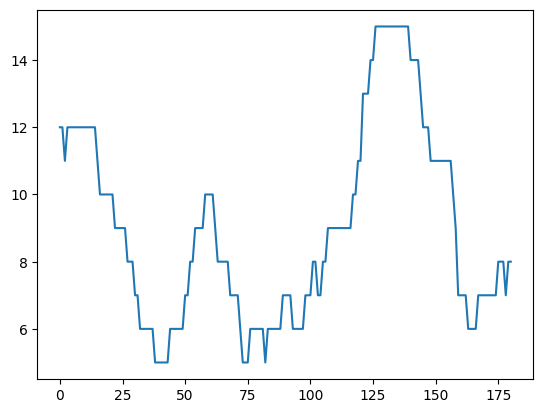

In [42]:
plt.plot(n_targets)

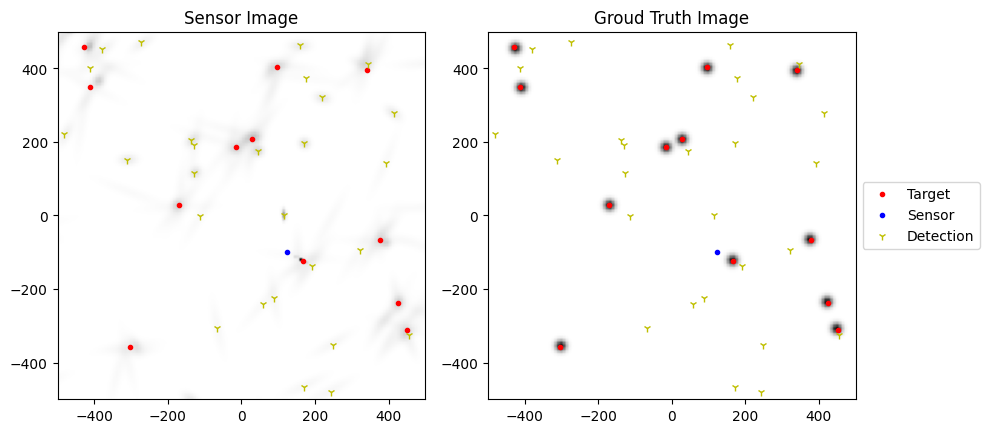

In [43]:
plot_mtt(*dataset[0])
plt.show()

In [67]:
from mtt.data import generate_data

simulator = init_simulator()
data = generate_data(online_dataset, n_simulations=1)

In [68]:
%timeit simulator.measurement_image(128, data[0][0][2], data[0][0][3])

91.1 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
%timeit simulator.measurement_image_torch(128, data[0][0][2], data[0][0][3], device="cuda")

41.5 ms ± 304 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
